#GRIPDECEMBER22

The Sparks Foundation

## Task2 - Prediction Using Unsupervised ML

Find optimum number of clusters for Iris Dataset

## Importing Relevant Libraries and Utilities

In [47]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## Importing Data

In [48]:
iris = load_iris()

In [49]:
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Inspecting the number of clusters via scatter plot

Text(0, 0.5, 'Petal Width')

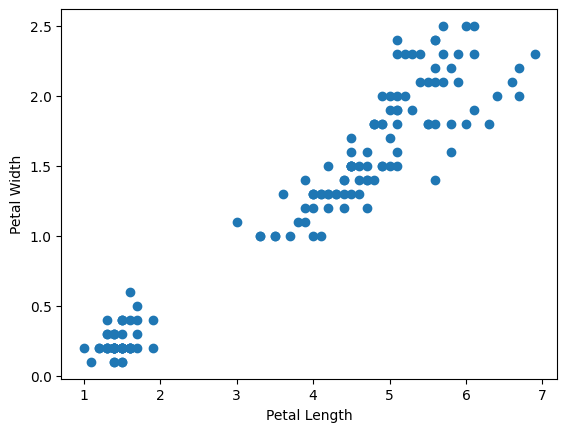

In [50]:
plt.scatter(df["petal length (cm)"], df["petal width (cm)"])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")



### Dropping the unwanted columns from the dataset

In [51]:
df.drop(columns=["sepal length (cm)", "sepal width (cm)"], inplace=True)
df.head()


,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


### Modelling Using K-Means Clustering

In [52]:
km = KMeans(n_clusters=3)
predicted = km.fit_predict(df)
predicted

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [53]:
df["cluster"]= predicted
df.head()


,petal length (cm),petal width (cm),cluster
0,1.4,0.2,2
1,1.4,0.2,2
2,1.3,0.2,2
3,1.5,0.2,2
4,1.4,0.2,2


### Preprocessing the Data for better visualization

In [54]:
scaler = MinMaxScaler()

df["petal width (cm)"] = scaler.fit_transform(df[["petal width (cm)"]])
df["petal length (cm)"] = scaler.fit_transform(df[["petal length (cm)"]])
df.head()


,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,2
1,0.067797,0.041667,2
2,0.050847,0.041667,2
3,0.084746,0.041667,2
4,0.067797,0.041667,2


Text(0, 0.5, 'Petal Width (cm)')

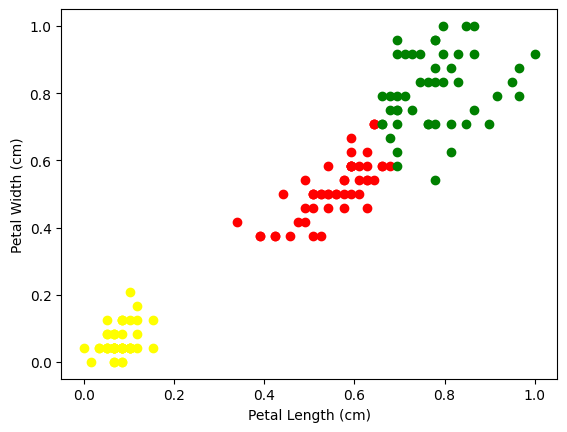

In [55]:
df1= df[df.cluster==0]
df2= df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1["petal length (cm)"], df1["petal width (cm)"],color='red')
plt.scatter(df2["petal length (cm)"], df2["petal width (cm)"],color='green')
plt.scatter(df3["petal length (cm)"], df3["petal width (cm)"],color='yellow')
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")


In [56]:
# Finding the optimum number of clusters using elbow method

sse=[]
for k in range(1,10):
    km= KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

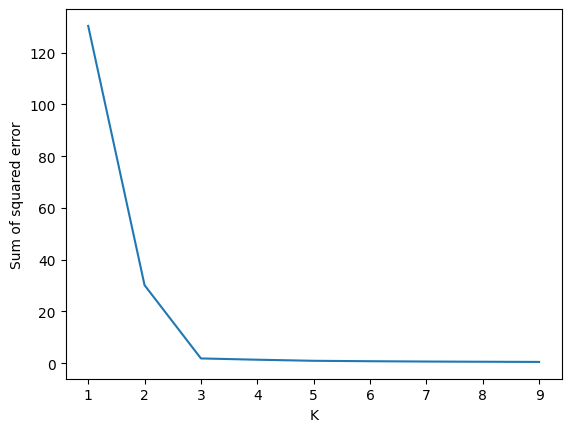

In [57]:
plt.xlabel("K")
plt.ylabel("Sum of squared error")
plt.plot(range(1,10), sse)

## OPTIMUM NUMBER OF CLUSTERS ARE 3, HENCE FOUND!